In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [187]:
data = pd.read_csv('titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [188]:
d_data = data.drop(['PassengerId', 'Embarked', 'Name', 'Ticket'], axis=1)
d_data['Sex'] = d_data['Sex'].map({'male': 0, 'female': 1})

In [189]:
d_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,0,22.0,1,0,7.2500,NaN
1,1,1,1,38.0,1,0,71.2833,C85
2,1,3,1,26.0,0,0,7.9250,NaN
3,1,1,1,35.0,1,0,53.1000,C123
4,0,3,0,35.0,0,0,8.0500,NaN
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,NaN
887,1,1,1,19.0,0,0,30.0000,B42
888,0,3,1,NaN,1,2,23.4500,NaN
889,1,1,0,26.0,0,0,30.0000,C148


In [190]:
d_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### 0 - Not Survived
### 1 - Survived

In [191]:
d_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

### Split data by `Pclass`

In [192]:
first_class = d_data[d_data['Pclass'] == 1]
second_class = d_data[d_data['Pclass'] == 2]
third_class = d_data[d_data['Pclass'] == 3]

In [193]:
first_class['Survived'].value_counts()

Survived
1    136
0     80
Name: count, dtype: int64

In [194]:
round((len(first_class[first_class['Survived'] == 1]) / len(first_class['Survived'])) * 100, 2)

62.96

In [195]:
second_class['Survived'].value_counts()

Survived
0    97
1    87
Name: count, dtype: int64

In [196]:
round((len(second_class[second_class['Survived'] == 1]) / len(second_class['Survived'])) * 100, 2)

47.28

In [197]:
third_class['Survived'].value_counts()

Survived
0    372
1    119
Name: count, dtype: int64

In [198]:
round((len(third_class[third_class['Survived'] == 1]) / len(third_class['Survived'])) * 100, 2)

24.24

In [199]:
survived_sex_age = d_data[['Survived', 'Sex', 'Age']]
survived_sex_age

,Survived,Sex,Age
0,0,0,22.0
1,1,1,38.0
2,1,1,26.0
3,1,1,35.0
4,0,0,35.0
...,...,...,...
886,0,0,27.0
887,1,1,19.0
888,0,1,NaN
889,1,0,26.0


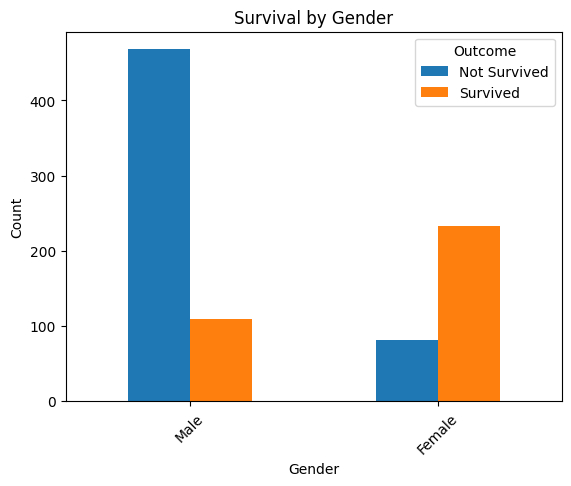

In [200]:
counts = survived_sex_age.groupby(['Sex','Survived']).size().unstack()

counts.index = counts.index.map({0: 'Male', 1: 'Female'})
counts.columns = counts.columns.map({0: 'Not Survived', 1: 'Survived'})

ax = counts.plot(kind='bar')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Survival by Gender')
ax.legend(title='Outcome')
plt.xticks(rotation=45)
plt.show()

In [201]:
male = d_data[d_data['Sex'] == 0]
female = d_data[d_data['Sex'] == 1]

In [231]:
male_survived = male[male['Survived'] == 1]
male_not_survived = male[male['Survived'] == 0]
round(len(male_survived) / len(male), 3) * 100

18.9

In [230]:
female_survived = female[female['Survived'] == 1]
female_not_survived = female[female['Survived'] == 0]
round(len(female_survived) / len(female), 3) * 100

74.2

In [218]:
male.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,577.000000,577.000000,577.0,453.000000,577.000000,577.000000,577.000000
mean,0.188908,2.389948,0.0,30.726645,0.429809,0.235702,25.523893
std,0.391775,0.813580,0.0,14.678201,1.061811,0.612294,43.138263
min,0.000000,1.000000,0.0,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.0,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,0.0,29.000000,0.000000,0.000000,10.500000
75%,0.000000,3.000000,0.0,39.000000,0.000000,0.000000,26.550000
max,1.000000,3.000000,0.0,80.000000,8.000000,5.000000,512.329200


In [219]:
female.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,314.000000,314.000000,314.0,261.000000,314.000000,314.000000,314.000000
mean,0.742038,2.159236,1.0,27.915709,0.694268,0.649682,44.479818
std,0.438211,0.857290,0.0,14.110146,1.156520,1.022846,57.997698
min,0.000000,1.000000,1.0,0.750000,0.000000,0.000000,6.750000
25%,0.000000,1.000000,1.0,18.000000,0.000000,0.000000,12.071875
50%,1.000000,2.000000,1.0,27.000000,0.000000,0.000000,23.000000
75%,1.000000,3.000000,1.0,37.000000,1.000000,1.000000,55.000000
max,1.000000,3.000000,1.0,63.000000,8.000000,6.000000,512.329200


In [245]:
female.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)

Survived,0,1
Pclass,,
1,3,91
2,6,70
3,72,72


In [247]:
male.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)

Survived,0,1
Pclass,,
1,77,45
2,91,17
3,300,47
